# Why Numpy & Pandas?

两个科学运算当中最为重要的两个模块，一个是 numpy,一个是 pandas。

运算速度快：numpy 和 pandas 都是采用 C 语言编写, pandas 又是基于 numpy, 是 numpy 的升级版本。
消耗资源少：采用的是矩阵运算，会比 python 自带的字典或者列表快好多

应用:数据分析、机器学习、深度学习

# Pandas 基本介绍
## Numpy 和 Pandas 有什么不同

如果用 python 的列表和字典来作比较, 那么可以说 Numpy 是列表形式的，没有数值标签，而 Pandas 就是字典形式。Pandas是基于Numpy构建的，让Numpy为中心的应用变得更加简单。

要使用pandas，首先需要了解他主要两个数据结构：Series和DataFrame。

## 两个数据结构：Series和DataFrame

In [1]:
#Series

import pandas as pd
import numpy as np

s = pd.Series([1,3,6,np.nan,44,1])
print(s)

#Series的字符串表现形式为：索引在左边，值在右边。

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64


### DataFrame是一个表格型的数据结构，它包含有一组有序的列，每列可以是不同的值类型（数值，字符串，布尔值等）。DataFrame既有行索引也有列索引， 它可以被看做由Series组成的大字典。

In [2]:
#DataFrame

dates = pd.date_range('20160101',periods=6) #since20160101往後推六天,period=期間
print(dates)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq='D')


In [3]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=['a','b','c','d'])
#index=row
print(df)

                   a         b         c         d
2016-01-01 -0.446215 -0.238622  0.078898 -0.574114
2016-01-02 -0.507941  2.427028  0.529730  0.073543
2016-01-03  0.556616  0.489121  0.858406  1.772368
2016-01-04 -0.683730  2.042628 -0.561458 -0.889217
2016-01-05 -0.720147 -1.589952 -0.578474  1.585152
2016-01-06 -0.374978 -0.670114  0.520494 -0.724687


In [4]:
print(df['b'])

2016-01-01   -0.238622
2016-01-02    2.427028
2016-01-03    0.489121
2016-01-04    2.042628
2016-01-05   -1.589952
2016-01-06   -0.670114
Freq: D, Name: b, dtype: float64


In [5]:
# 创建一组没有给定行标签和列标签的数据 df1
df1 = pd.DataFrame(np.arange(12).reshape((3,4)))
print(df1)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


In [6]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo'})
                     
#pandas=dict
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


In [7]:
print(df2.dtypes)

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


In [8]:
print(df2.index)    #index=row

Int64Index([0, 1, 2, 3], dtype='int64')


In [9]:
print(df2.columns)

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')


In [10]:
#所有df2的值
print(df2.values)

[[1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 'train' 'foo']]


In [11]:
df2.describe() #数据的总结

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [12]:
print(df2.T)  #transpose 翻转数据

                     0                    1                    2  \
A                    1                    1                    1   
B  2013-01-02 00:00:00  2013-01-02 00:00:00  2013-01-02 00:00:00   
C                    1                    1                    1   
D                    3                    3                    3   
E                 test                train                 test   
F                  foo                  foo                  foo   

                     3  
A                    1  
B  2013-01-02 00:00:00  
C                    1  
D                    3  
E                train  
F                  foo  


In [13]:
print(df.sort_index(axis=1,ascending=False)) #from 20160101 to 20160106

                   d         c         b         a
2016-01-01 -0.574114  0.078898 -0.238622 -0.446215
2016-01-02  0.073543  0.529730  2.427028 -0.507941
2016-01-03  1.772368  0.858406  0.489121  0.556616
2016-01-04 -0.889217 -0.561458  2.042628 -0.683730
2016-01-05  1.585152 -0.578474 -1.589952 -0.720147
2016-01-06 -0.724687  0.520494 -0.670114 -0.374978


In [14]:
print(df.sort_index(axis=0,ascending=False)) #from 20160106 to 20160101

                   a         b         c         d
2016-01-06 -0.374978 -0.670114  0.520494 -0.724687
2016-01-05 -0.720147 -1.589952 -0.578474  1.585152
2016-01-04 -0.683730  2.042628 -0.561458 -0.889217
2016-01-03  0.556616  0.489121  0.858406  1.772368
2016-01-02 -0.507941  2.427028  0.529730  0.073543
2016-01-01 -0.446215 -0.238622  0.078898 -0.574114


In [15]:
print(df2.sort_values(by='B'))

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


# Pandas 选择数据

In [17]:
#建立了一个 6X4 的矩阵数据

dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
print(df)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


In [18]:
print(df.A)  #same as print(df['A'])

2013-01-01     0
2013-01-02     4
2013-01-03     8
2013-01-04    12
2013-01-05    16
2013-01-06    20
Freq: D, Name: A, dtype: int32


In [19]:
print(df[0:3])  #row since 0 to 2

            A  B   C   D
2013-01-01  0  1   2   3
2013-01-02  4  5   6   7
2013-01-03  8  9  10  11


In [20]:
print(df['20130102':'20130104'])

             A   B   C   D
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15


In [23]:
print(df)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


# 根据标签 loc
## 主要通过外圍"标签label"名字选择某一行数据

In [24]:
#select by label:loc

print(df.loc['20130102'])   

A    4
B    5
C    6
D    7
Name: 2013-01-02 00:00:00, dtype: int32


In [25]:
print(df.loc[:,['A','B']]) 

             A   B
2013-01-01   0   1
2013-01-02   4   5
2013-01-03   8   9
2013-01-04  12  13
2013-01-05  16  17
2013-01-06  20  21


In [30]:
print(df)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


# 根据序列 iloc
### 主要通过內圈"位置position"选择在不同情况下所需要的数据

In [31]:
#select by position:iloc

print(df.iloc[3:5,1])
print(df.iloc[[1,3,5], 1:3])

2013-01-04    13
2013-01-05    17
Freq: D, Name: B, dtype: int32
             B   C
2013-01-02   5   6
2013-01-04  13  14
2013-01-06  21  22


# 根据混合選擇的这两种 ix

In [32]:
# mixed selection:ix

print(df.ix[:3,['A','C']])
#选择’A’和’C’的两列，并选择前三行的数据

            A   C
2013-01-01  0   2
2013-01-02  4   6
2013-01-03  8  10


C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
#Boolean indexing

print(df)
print(df[df.A > 8])  #find column A >8

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23
             A   B   C   D
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


# Pandas 设置值
## 如何对DataFrame中在自己想要的地方赋值或者增加数据

In [34]:
#先建立了一个 6X4 的矩阵数据。

dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])

print(df)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


In [35]:
# 根据位置设置 loc 和 iloc
# 利用索引或者标签确定需要修改值的位置

df.iloc[2,2]=1111
df.loc['20130101','B']=2222

print(df)

             A     B     C   D
2013-01-01   0  2222     2   3
2013-01-02   4     5     6   7
2013-01-03   8     9  1111  11
2013-01-04  12    13    14  15
2013-01-05  16    17    18  19
2013-01-06  20    21    22  23


In [38]:
#根据条件设置
#更改B中的数, 而更改的位置是取决于 A 的. 对于A大于4的位置. 更改B在相应位置上的数为0

df.B[df.A>4] = 0
print(df)

             A     B     C   D
2013-01-01   0  2222     2   3
2013-01-02   4     5     6   7
2013-01-03   8     0  1111  11
2013-01-04  12     0    14  15
2013-01-05  16     0    18  19
2013-01-06  20     0    22  23


In [39]:
# 按行或列设置
df['F'] = np.nan   #add column "F" and insert data "nan"
print(df)

             A     B     C   D   F
2013-01-01   0  2222     2   3 NaN
2013-01-02   4     5     6   7 NaN
2013-01-03   8     0  1111  11 NaN
2013-01-04  12     0    14  15 NaN
2013-01-05  16     0    18  19 NaN
2013-01-06  20     0    22  23 NaN


In [40]:
# 添加数据
df['E'] = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130101',periods=6)) 
print(df)             #add column 'E' and insert data

             A     B     C   D   F  E
2013-01-01   0  2222     2   3 NaN  1
2013-01-02   4     5     6   7 NaN  2
2013-01-03   8     0  1111  11 NaN  3
2013-01-04  12     0    14  15 NaN  4
2013-01-05  16     0    18  19 NaN  5
2013-01-06  20     0    22  23 NaN  6


# Pandas 处理丢失数据

## 有时候导入或处理数据, 会产生一些空的或者是 NaN 数据,如何删除或者是填补这些 NaN 数据

In [41]:
import pandas as pd
import numpy as np

# 建立了一个6X4的矩阵数据并且把两个位置置为空
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates, columns=['A','B','C','D'])
print(df)

             A   B   C   D
2013-01-01   0   1   2   3
2013-01-02   4   5   6   7
2013-01-03   8   9  10  11
2013-01-04  12  13  14  15
2013-01-05  16  17  18  19
2013-01-06  20  21  22  23


In [42]:
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan

print(df)

             A     B     C   D
2013-01-01   0   NaN   2.0   3
2013-01-02   4   5.0   NaN   7
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23


## pd.dropna()

In [43]:
#直接去掉有 NaN 的行或列, 可以使用 dropna

print(df.dropna(axis=0,how='any')) #how={any,all},axis=0 is column

             A     B     C   D
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23


## pd.fillna()

In [44]:
#将 NaN 的值用其他值代替, 比如代替成 0

print(df.fillna(value=0)) #把欄位值是NaN全補上0

             A     B     C   D
2013-01-01   0   0.0   2.0   3
2013-01-02   4   5.0   0.0   7
2013-01-03   8   9.0  10.0  11
2013-01-04  12  13.0  14.0  15
2013-01-05  16  17.0  18.0  19
2013-01-06  20  21.0  22.0  23


## pd.isnull()

In [45]:
#判断是否有缺失数据 NaN, 为 True 表示缺失数据

print(df.isnull())  #show True/False

                A      B      C      D
2013-01-01  False   True  False  False
2013-01-02  False  False   True  False
2013-01-03  False  False  False  False
2013-01-04  False  False  False  False
2013-01-05  False  False  False  False
2013-01-06  False  False  False  False


In [47]:
#检测在数据中是否存在 NaN, 如果存在就返回 True

np.any(df.isnull()) == True

True

# Pandas 資料讀取與寫入csv

## pandas可以读取与存取的资料格式有很多种，像csv、excel、json、html与pickle等…

In [49]:
import pandas as pd

#读取csv,直接把檔案放在與ipython放在同一層位置，且直接在path位置寫上檔名即可
#data=pd.read.csv("path.csv")

#打印出data、第一行自動加上索引
#print(data)

#寫入csv檔並增加檔名
#data.to_csv("table_name")

# Pandas 合并 concat

pandas处理多组数据的时候往往会要用到数据的合并处理
使用 concat是一种基本的合并方式.而且concat中有很多参数可以调整,合并成你想要的数据形式

## axis (合并方向)

In [50]:
import pandas as pd
import numpy as np

#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])

print(df1)
print(df2)
print(df3)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
     a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
     a    b    c    d
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [51]:
#concat row合并
#axis=0是预设值，因此未设定任何参数时，函数默认axis=0
res = pd.concat([df1, df2, df3], axis=0)

#打印结果，index是0, 1, 2, 0, 1, 2, 0, 1, 2
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


# ignore_index (重置 index)

In [52]:
#承上一个例子，并将index_ignore设定为True，代表第一排自動編號
#结果的index变0, 1, 2, 3, 4, 5, 6, 7, 8。

res = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


# join (合并方式) 

### 未设定任何参数，函数默认join='outer'。
此方式是依照column来做纵向合并，有相同的column上下合并在一起，其他独自的column个自成列，原本没有值的位置皆以NaN填充。

In [55]:
import pandas as pd
import numpy as np

#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])
#index=row
print(df1)
print(df2)

     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
     b    c    d    e
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0


In [54]:
#纵向"外"合并df1与df2
res = pd.concat([df1, df2], axis=0, join='outer')
print(res)

     a    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  NaN
2  NaN  1.0  1.0  1.0  1.0
3  NaN  1.0  1.0  1.0  1.0
4  NaN  1.0  1.0  1.0  1.0


C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [56]:
#纵向合并df1与df2 (縱向合併 axis=0)
#只有相同的column合并在一起，其他的会被抛弃

res = pd.concat([df1, df2], axis=0, join='inner')
print(res)

     b    c    d
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  0.0  0.0  0.0
2  1.0  1.0  1.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0


In [57]:
#重置index并打印结果，增加ignore
res = pd.concat([df1, df2], axis=0, join='inner', ignore_index=True)
print(res)

     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0


## join_axes (依照 axes 合并)

In [58]:
import pandas as pd
import numpy as np

#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])
print(df1)
print(df2)

     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
     b    c    d    e
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0


In [59]:
#依照`df1.index`进行横向合并(axis=1)
res = pd.concat([df1, df2], axis=1, join_axes=[df1.index])

#打印结果
print(res)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0


In [60]:
#移除join_axes，并打印结果

res = pd.concat([df1, df2], axis=1)
print(res)

     a    b    c    d    b    c    d    e
1  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0
4  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0


# append (添加数据)

## append只有纵向合并，没有横向合并。

In [61]:
import pandas as pd
import numpy as np

#定义资料集
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])

print(s1)

a    1
b    2
c    3
d    4
dtype: int64


In [62]:
#将df2合并到df1的下面，以及重置index，并打印出结果

res = df1.append(df2, ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0


In [63]:
#合并多个df，将df2与df3合并至df1的下面，以及重置index，并打印出结果

res = df1.append([df2, df3], ignore_index=True)
print(res)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  1.0  1.0  1.0  1.0
7  1.0  1.0  1.0  1.0
8  1.0  1.0  1.0  1.0


In [64]:
#合并series，将s1合并至df1，以及重置index，并打印出结果
res = df1.append(s1, ignore_index=True)
print(s1)
print(res)

a    1
b    2
c    3
d    4
dtype: int64
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  2.0  3.0  4.0


# Pandas 合并 merge

## pandas中的merge和concat类似
## 但主要是用于两组有key column的数据,统一索引的数据. 通常也被用在Database的处理当中.

### 依据一组key合并

In [65]:
import pandas as pd

#定义资料集并打印出
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                             'A': ['A0', 'A1', 'A2', 'A3'],
                             'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                              'C': ['C0', 'C1', 'C2', 'C3'],
                              'D': ['D0', 'D1', 'D2', 'D3']})

print(left)
print(right)

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3


In [66]:
#依据key column合并，并打印出
res = pd.merge(left, right, on='key')
print(res)

  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


# 依据两组key合并

In [67]:
import pandas as pd

#定义资料集并打印出
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                      'key2': ['K0', 'K1', 'K0', 'K1'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                       'key2': ['K0', 'K0', 'K0', 'K0'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})
print(left)
print(right)

  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3


## 合并时有4种方法

## how = ['left', 'right', 'outer', 'inner']，预设值how='inner'

In [68]:
#依据key1与key2 columns进行合并
res = pd.merge(left, right, on=['key1', 'key2'], how='inner')
print(res)

  key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2


In [69]:
res = pd.merge(left, right, on=['key1', 'key2'], how='outer')
print(res)

  key1 key2    A    B    C    D
0   K0   K0   A0   B0   C0   D0
1   K0   K1   A1   B1  NaN  NaN
2   K1   K0   A2   B2   C1   D1
3   K1   K0   A2   B2   C2   D2
4   K2   K1   A3   B3  NaN  NaN
5   K2   K0  NaN  NaN   C3   D3


In [70]:
print(left)
print(right)

  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3


In [71]:
res = pd.merge(left, right, on=['key1', 'key2'], how='left')
print(res)

#以left_AB為主，right_CD空白處補空值nan

  key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN


In [74]:
res = pd.merge(left, right, on=['key1', 'key2'], how='right')
print(res)

##以right_CD為主，left_AB空白處補空值nan

  key1 key2    A    B   C   D
0   K0   K0   A0   B0  C0  D0
1   K1   K0   A2   B2  C1  D1
2   K1   K0   A2   B2  C2  D2
3   K2   K0  NaN  NaN  C3  D3


# Indicator

In [75]:
import pandas as pd

#定义资料集并打印出
df1 = pd.DataFrame({'col1':[0,1], 'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})
print(df1)
print(df2)

   col1 col_left
0     0        a
1     1        b
   col1  col_right
0     1          2
1     2          2
2     2          2


## indicator=True会将合并的记录放在新的一列(最右邊)

In [76]:
# 依据col1进行合并，并启用indicator=True，最右邊的merge欄位
res = pd.merge(df1, df2, on='col1', how='outer', indicator=True)
print(res)

   col1 col_left  col_right      _merge
0     0        a        NaN   left_only
1     1        b        2.0        both
2     2      NaN        2.0  right_only
3     2      NaN        2.0  right_only


In [77]:
# 自定indicator column的名称，并打印出
res = pd.merge(df1, df2, on='col1', how='outer', indicator='indicator_column')
print(res)

   col1 col_left  col_right indicator_column
0     0        a        NaN        left_only
1     1        b        2.0             both
2     2      NaN        2.0       right_only
3     2      NaN        2.0       right_only


## 依据index合并

In [78]:
import pandas as pd

#定义资料集并打印出
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])

print(left)
print(right)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3


In [79]:
#依据左右资料集的index进行合并，how='outer',并打印出
res = pd.merge(left, right, left_index=True, right_index=True, how='outer')
print(res)

      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3


In [80]:
#依据左右资料集的index进行合并，how='inner',并打印出
res = pd.merge(left, right, left_index=True, right_index=True, how='inner')
print(res)

     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2


# 解决overlapping的问题

In [81]:
import pandas as pd

#定义资料集
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
print(boys)
print(girls)

    k  age
0  K0    1
1  K1    2
2  K2    3
    k  age
0  K0    4
1  K0    5
2  K3    6


In [82]:
#使用suffixes解决overlapping的问题
res = pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='inner')
print(res)

    k  age_boy  age_girl
0  K0        1         4
1  K0        1         5


# Pandas plot 出图

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
#创建一个Series，随机生成1000个数据
#这是一个线性的数据，随机生成1000个数据，Series 默认的 index 就是从0开始的整数

data = pd.Series(np.random.random(1000),index=np.arange(1000))


In [86]:
# 为了方便观看效果, 我们累加这个数据
data.cumsum()

0        0.031603
1        0.942633
2        1.360903
3        1.548771
4        1.946235
5        2.615354
6        3.256621
7        4.183194
8        4.480075
9        5.060498
10       6.055266
11       6.566667
12       7.124973
13       7.750133
14       8.150237
15       8.433344
16       8.797247
17       9.258409
18      10.032970
19      10.622972
20      11.437192
21      11.917794
22      12.436545
23      12.973457
24      13.041958
25      13.227930
26      13.685801
27      14.015177
28      14.492517
29      15.328656
          ...    
970    482.265825
971    483.206587
972    483.781866
973    484.441130
974    484.574515
975    484.772214
976    485.491714
977    485.895738
978    486.225706
979    486.399897
980    486.443616
981    487.120580
982    488.087789
983    488.319893
984    488.468842
985    488.991191
986    489.058044
987    489.640388
988    489.864243
989    490.820242
990    490.916728
991    491.276857
992    491.548022
993    492.384428
994    493

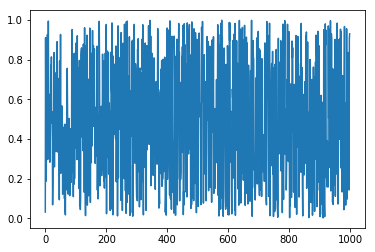

In [87]:
# pandas 数据可以直接观看其可视化形式
data.plot()

In [88]:
plt.show()

## 除了plot，我经常会用到还有scatter，这个会显示散点图，

## 首先给大家说一下在 pandas 中有多少种方法

#bar
#hist
#box
#kde
#area
#scatter
#hexbin

# Dataframe 可视化

In [89]:
data = pd.DataFrame(
    np.random.randn(1000,4),
    index=np.arange(1000),
    columns=list("ABCD")
    )
print(data)
#data.cumsum()
#data.plot()
#plt.show()

            A         B         C         D
0    0.677575 -0.632649 -0.013869  0.560564
1    0.213493 -0.489815 -0.880442 -1.075727
2   -1.348205 -0.587112 -0.503074  1.526156
3   -0.881696 -0.214684  0.138599  0.665183
4    1.270168  3.526566  0.723757 -0.013437
5    0.467927 -0.253487 -0.649203  0.626694
6    0.892021 -0.683160  1.300012 -0.129564
7   -0.994027  0.890445  0.680000  0.882557
8    2.500100  0.206540 -2.314659 -0.216613
9   -0.215445  0.295484  0.542934 -0.729866
10  -1.717034  1.086543 -1.355698  0.039440
11  -1.069690  0.485480 -0.756986 -0.323287
12  -1.427409  0.695616 -1.019284  0.212401
13  -0.103129 -0.859074  0.177403  0.203954
14  -1.528011  1.969592 -0.308369  2.185091
15   0.945609  1.173330 -0.444170 -0.545288
16   1.019914  0.846390  0.109573  0.636307
17  -1.760911  0.166722 -0.223157  0.175933
18  -1.577886 -0.413907 -0.682922  0.606022
19  -0.294905 -0.216579 -0.403523  1.610570
20   0.016679 -1.812660 -1.124528  0.748375
21   1.356887 -0.466464 -0.49674

In [93]:
data.cumsum()
#data.plot()
#plt.show()

,A,B,C,D
0,0.677575,-0.632649,-0.013869,0.560564
1,0.891068,-1.122464,-0.894311,-0.515163
2,-0.457136,-1.709577,-1.397384,1.010993
3,-1.338832,-1.924261,-1.258785,1.676175
4,-0.068665,1.602305,-0.535028,1.662738
5,0.399262,1.348818,-1.184231,2.289432
6,1.291283,0.665658,0.115781,2.159867
7,0.297256,1.556103,0.795781,3.042424
8,2.797356,1.762642,-1.518878,2.825811
9,2.581912,2.058126,-0.975944,2.095945


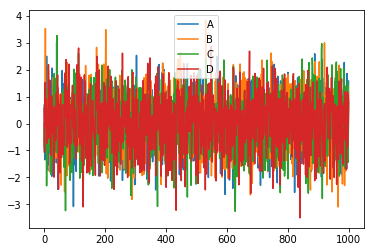

In [91]:
data.plot()
#plt.show()

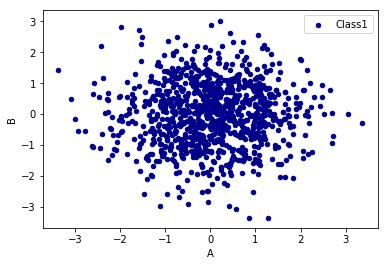

In [114]:
#scatter
ax = data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class1')

In [117]:
# 将之下这个 data 画在上一个 ax 上面
data.plot.scatter(x='A',y='C',color='LightGreen',label='Class2',ax=ax)
plt.show()